In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [5]:
df['Thal'].unique()

array(['fixed', 'normal', 'reversable', nan], dtype=object)

In [6]:
df = df.dropna()

In [7]:
df["ChestPainx"]= df.ChestPain.replace({"typical": 1, "asymptomatic": 2, "nonanginal": 3, "nontypical": 4})
df["Thalx"] = df.Thal.replace({"fixed": 1, "normal":2, "reversable":3})
df["AHD"] = df.AHD.replace({"Yes": 1, "No":0})

In [9]:
df = pd.concat([pd.Series(1, index = df.index, name = '00'), df], axis=1)
df.head()

,00,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ChestPainx,Thalx
0,1,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0,1,1
1,1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1,2,2
2,1,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1,2,3
3,1,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0,3,2
4,1,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0,4,2


In [10]:
X = df.drop(columns=["Unnamed: 0", "ChestPain", "Thal"])
X.head()

,00,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPainx,Thalx
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,1,1
1,1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,2,2
2,1,67,1,120,229,0,2,129,1,2.6,2,2.0,1,2,3
3,1,37,1,130,250,0,0,187,0,3.5,3,0.0,0,3,2
4,1,41,0,130,204,0,2,172,0,1.4,1,0.0,0,4,2


In [11]:
y= df["AHD"]

In [12]:
theta = [0.5]*len(X.columns)
theta

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [37]:
def hypothesis(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001

In [38]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [39]:
def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost(X, y, theta)] 
    for i in range(0, epochs):
        h = hypothesis(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost(X, y, theta))
    return J, theta    

In [40]:
L, theta = gradient_descent(X, y, theta, 0.03, 2)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = hypothesis(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc

In [47]:
predict(X, y, theta, 0.03, 3)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


([8.683149218644948, -0.0, 8.683149218644948, -0.0], 0.5387205387205387)

In [87]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.01, 20000)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
acc

0.6262626262626263

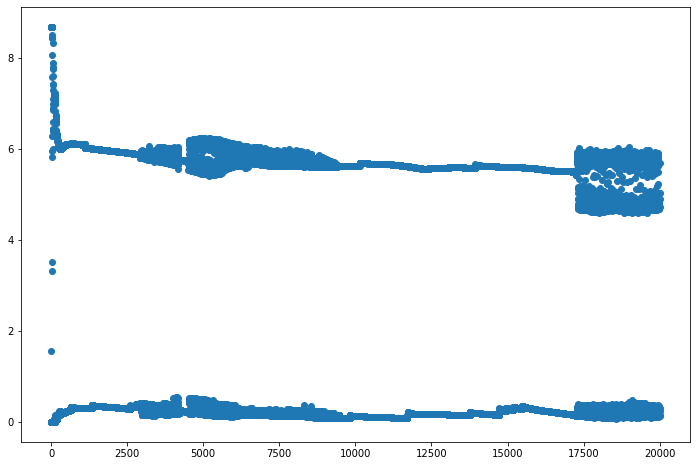

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()

In [95]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0005, 5000)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
acc

0.6127946127946128

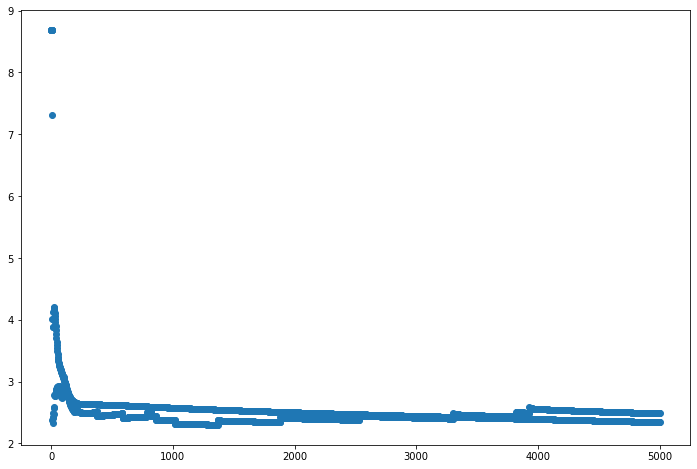

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()

In [101]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 15000)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
acc

0.8316498316498316

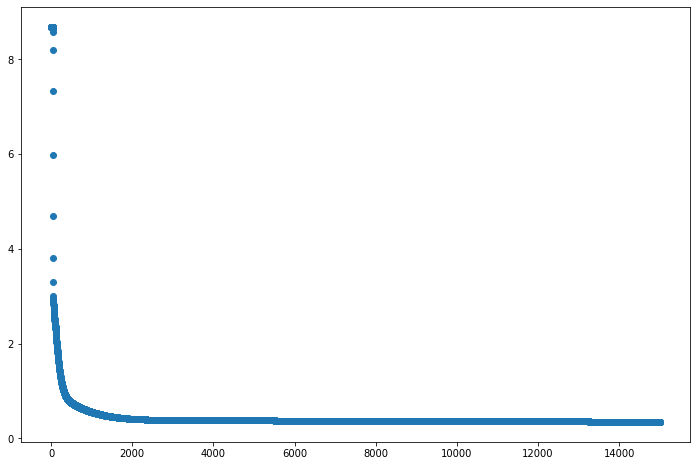

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()

In [104]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 20000)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:
acc

0.8417508417508418

In [116]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 25000)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


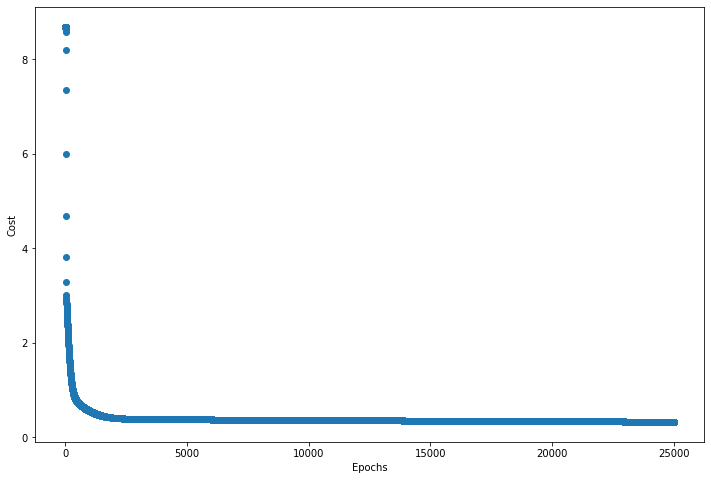

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [110]:
acc

0.8484848484848485

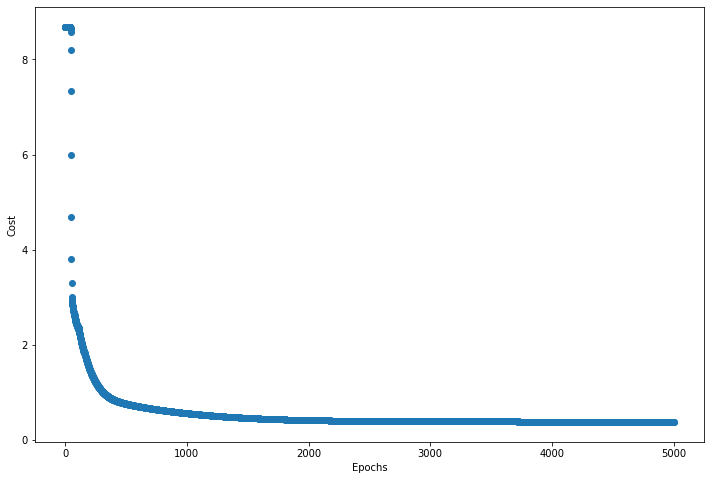

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [112]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 5000)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
acc

0.8181818181818182

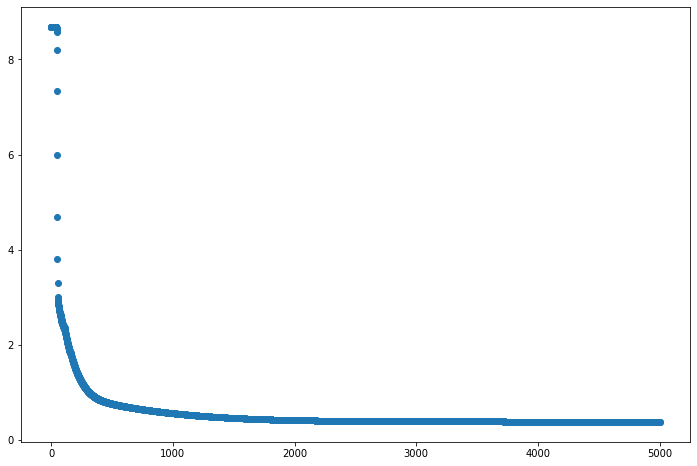

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()